In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# declare the packages required to create the network

In [5]:
df = pd.read_csv('heart.csv')
df

# create a dataframe with the heart.csv file that will be used to train the network

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
X = df.drop(columns='output')
y = df['output']

# defines a variable X that contains the column description of every and the data from each column as variable y


In [7]:
# Scale data - mean 0 std dev 1
# scales the data from X appropriately so each data point weighs the same

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
model = keras.Sequential([
    layers.Dense(8, input_dim=13, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

model.summary()

# defines the model with the appropriate parameters


2023-04-25 23:02:49.208736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


2023-04-25 23:02:49.822045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79125 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:b7:00.0, compute capability: 8.0


In [9]:
# Set some model hyperparameters
from tensorflow.keras.optimizers import Adam

lr = 0.001  # Set the learning rate. Start with default for Adam, 0.001
optimizer = Adam(learning_rate=lr)  # Set the optimizer. Start with adam.

# Compile the model--a necessary step with Keras models
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [10]:
history = model.fit(X, y, epochs=150, validation_split=0.25, batch_size=10, verbose=1)

# trains the model using the data stored in X and y

2023-04-25 23:02:58.711121: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
23/23 [==============================] - 1s 6ms/step - loss: 0.7442 - accuracy: 0.4714 - val_loss: 0.6278 - val_accuracy: 0.6711
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5639 - val_loss: 0.6424 - val_accuracy: 0.6842
Epoch 3/150
 1/23 [>.............................] - ETA: 0s - loss: 0.6359 - accuracy: 0.5000

2023-04-25 23:02:59.775396: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


23/23 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6388 - val_loss: 0.6569 - val_accuracy: 0.6447
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7048 - val_loss: 0.6684 - val_accuracy: 0.6184
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.7401 - val_loss: 0.6800 - val_accuracy: 0.6053
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7885 - val_loss: 0.6877 - val_accuracy: 0.5921
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8282 - val_loss: 0.6971 - val_accuracy: 0.5658
Epoch 8/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8326 - val_loss: 0.7062 - val_accuracy: 0.5395
Epoch 9/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8458 - val_loss: 0.7205 - val_accuracy: 0.5658
Epoch 10/150
23/23 [=====

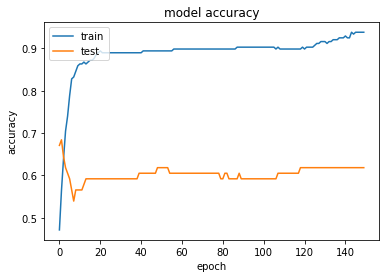

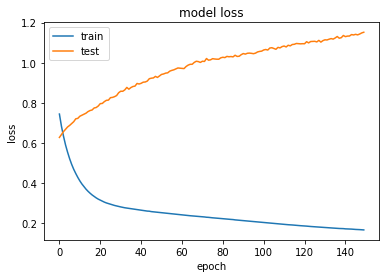

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# creates two plots: the first one shows the accuracy of the model while the second one shows the loss of the model per epoch 

In [13]:
new_data = pd.DataFrame({
    'age': [40],
    'sex': [1],
    'cp': [2],
    'trtbps': [130],
    'chol': [200],
    'fbs': [0],
    'restecg': [1],
    'thalachh': [160],
    'exng': [0],
    'oldpeak': [1],
    'slp': [2],
    'caa': [0],
    'thall': [3]
})

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(f'Heart attack High risk probability: {prediction[0][0]}')

# creates a data frame that utilizes the trained model to predict the probability of heart attack

Heart attack High risk probability: 0.9620975255966187
